## Student performance indicator
### life cycle of ML project
- understanding the problem statement
- data collection
- data checks to perform :
- exploratory data analysis
- data pre-processing
- model training
- choose best model

### 1. problem statement
- this project undestands how the student's performance (test score) is affected by other variables such as gender, ethnicity, parental level of education, lunch and test perparation course.

### 2. data collection
- dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- the data consists of 8 column and 1000 rows.

### 2.1 Import data and required packages
- importing pandas, numpy, matplotlib, seaborn, and warings library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/raw.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# shape of the dataset
df.shape

(1000, 8)

### 2.2 dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score
### 3. Data Checks to perform
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column
### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 exploring data

In [11]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("categories in 'gender' variable:               ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:       ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in parental_level_of_education:     ",df.parental_level_of_education.unique())

print("categories in lunch:                           ",df.lunch.unique())

print("categories in test_preparation_course:         ",df.test_preparation_course.unique())


categories in 'gender' variable:                ['female' 'male']
categories in 'race_ethnicity' variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch:                            ['standard' 'free/reduced']
categories in test_preparation_course:          ['none' 'completed']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print the columns 
print('we have {} numerical featues : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical featues : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total_score'] = df['math_score'] + df['reading_score']+ df['writing_score']
df['average'] = df['total_score']/len(numeric_features)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df.reading_score == 100]['average'].count()
writing_full = df[df.writing_score ==100]['average'].count()
maths_full = df[df.math_score == 100]['average'].count()

print('number of students with full marks in reading : ',reading_full)
print('number of students with full marks in writing : ',writing_full)
print('number of students with full marks in maths : ',maths_full)

number of students with full marks in reading :  17
number of students with full marks in writing :  14
number of students with full marks in maths :  7


In [16]:
reading_less_20 = df[df.reading_score < 20]['average'].count()
writing_less_20 = df[df.writing_score < 20]['average'].count()
math_less_20 = df[df.math_score < 20]['average'].count()
print('Number of students with less than 20 marks in reading :',reading_less_20)
print('Number of students with less than 20 marks in writing :',writing_less_20)
print('Number of students with less than 20 marks in math :',math_less_20)

Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in math : 4


**Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)
### 4.1.1 Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

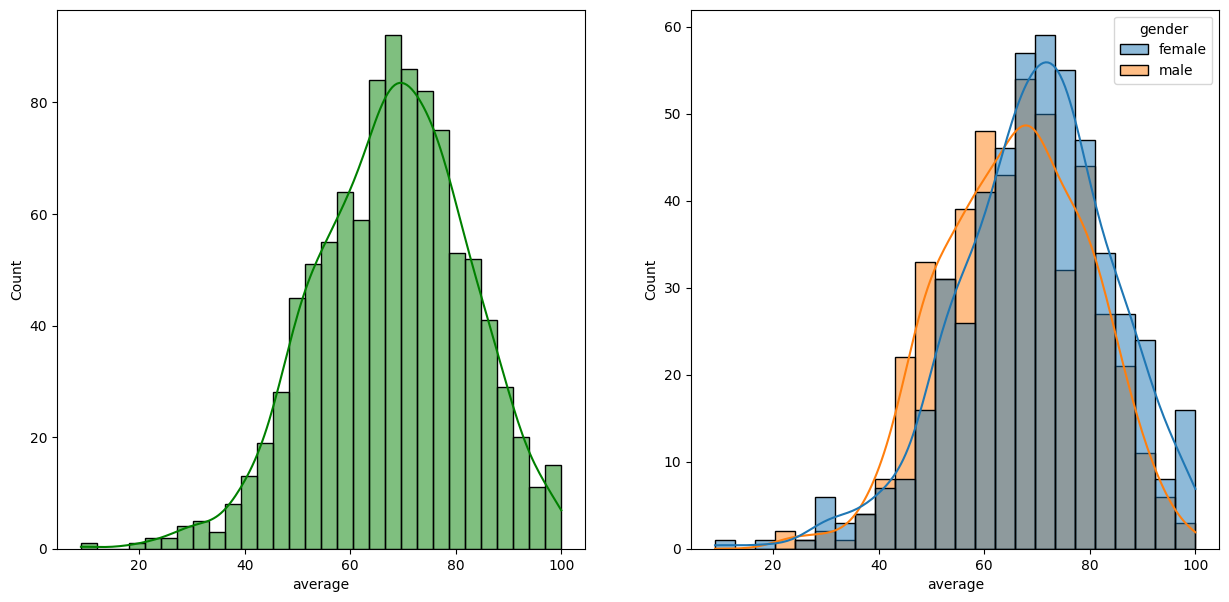

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
#In plt.subplot(), the first number 1 refers to the number of rows, the second number 4 refers to the number of columns, and the last number refers to the position of the subplot.
plt.subplot(121) 
sns.histplot(data=df, x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

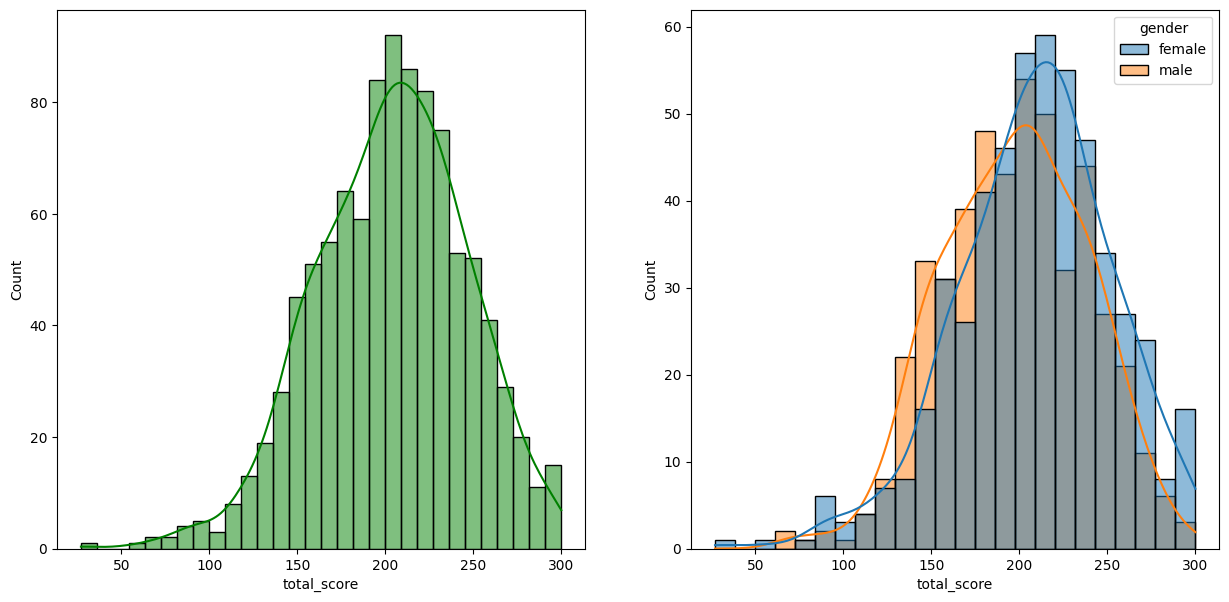

In [18]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score',bins=30,kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total_score',kde=True, hue='gender')

**Insights**
- Female students tend to perform well then male students.

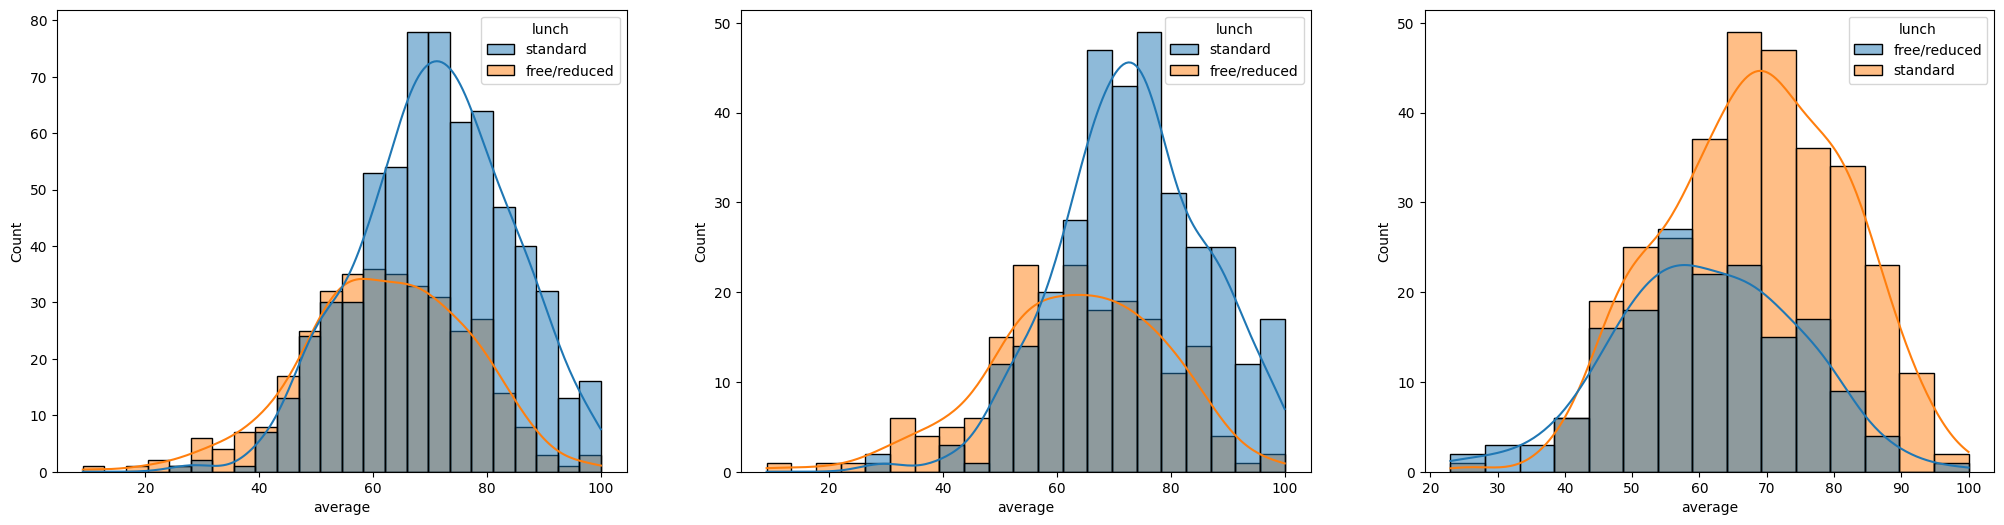

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='lunch')

plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

<Axes: xlabel='average', ylabel='Count'>

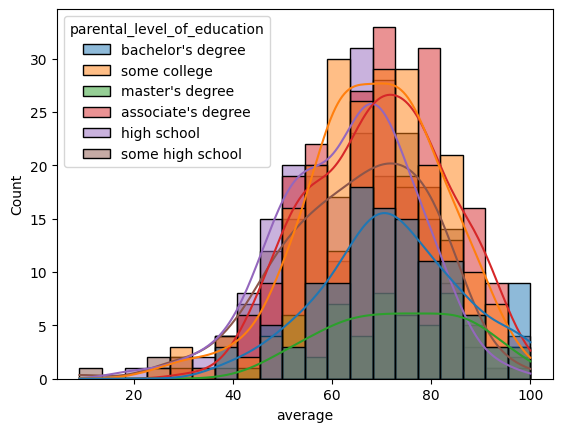

In [20]:
# fig, axes = plt.subplots(1,3,figsize=(30,9))
# plt.subplot(131)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='parental_level_of_education')

<Axes: xlabel='average', ylabel='Count'>

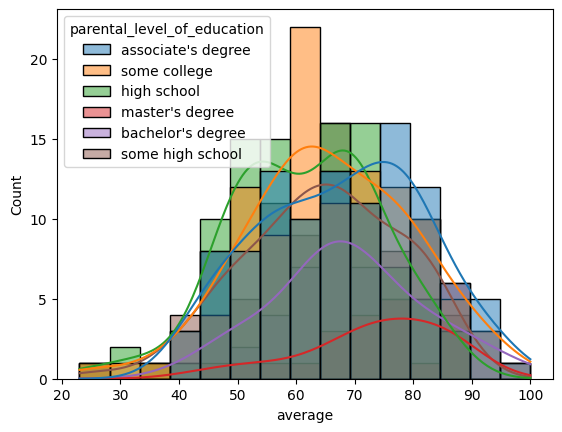

In [21]:
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='parental_level_of_education')

<Axes: xlabel='average', ylabel='Count'>

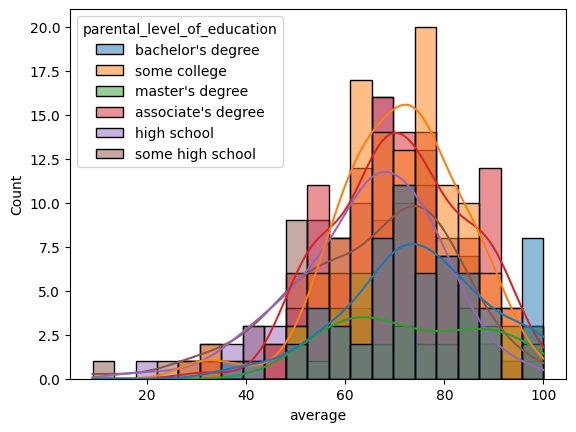

In [22]:
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='parental_level_of_education')

**Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

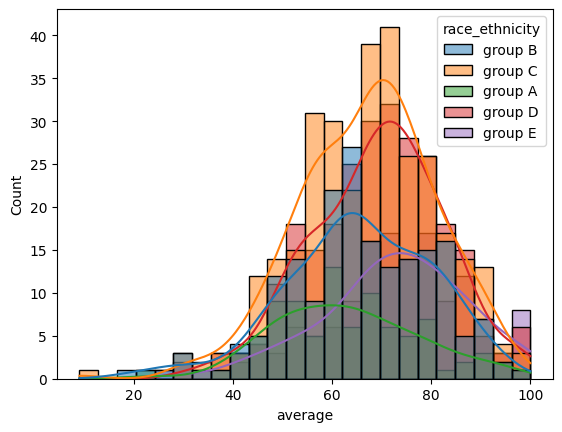

In [23]:
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

<Axes: xlabel='average', ylabel='Count'>

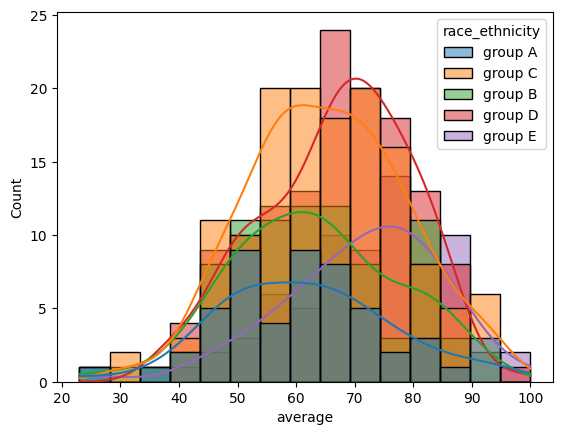

In [24]:
sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='race_ethnicity')

<Axes: xlabel='average', ylabel='Count'>

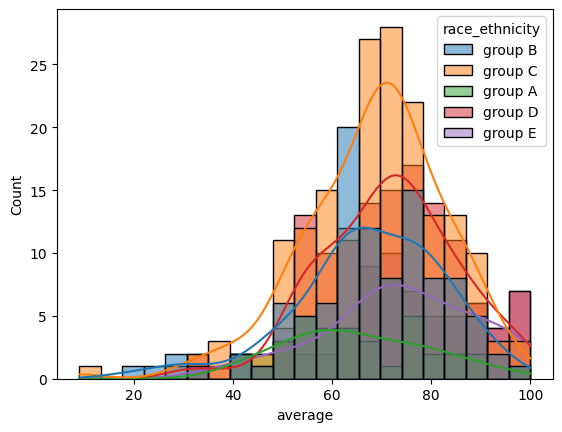

In [25]:
sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='race_ethnicity')

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
### 4.2 Maximumum score of students in all three subjects

<Axes: title={'center': 'Writing score'}, ylabel='writing_score'>

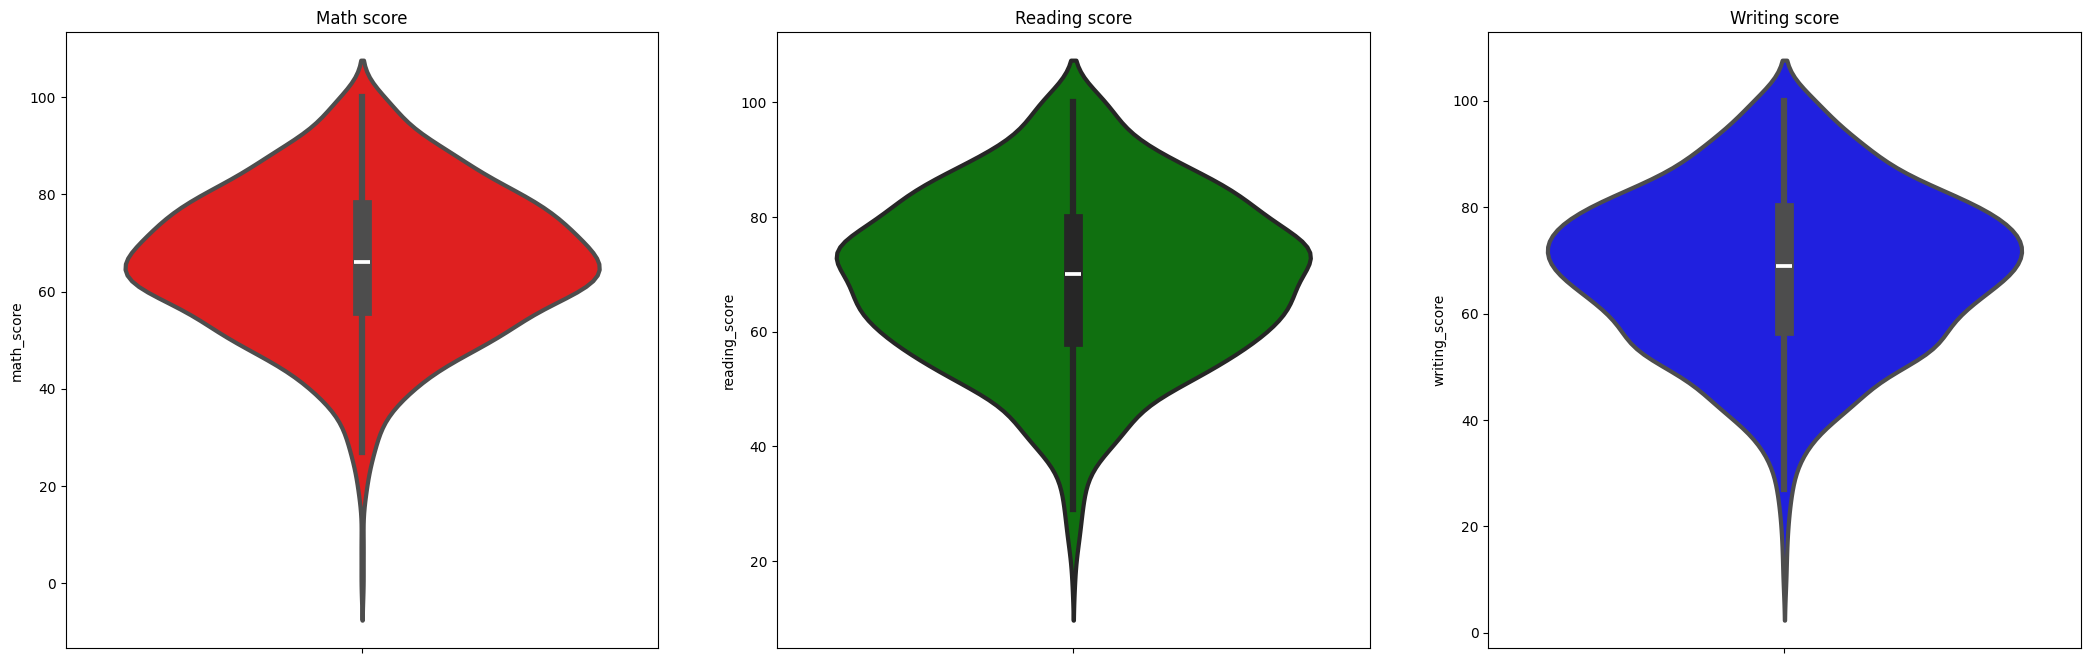

In [26]:
fig, axes = plt.subplots(1,3,figsize=(26,8))
plt.subplot(1,3,1)
plt.title('Math score')
sns.violinplot(y='math_score',data =df,color='red', linewidth=3)

plt.subplot(1,3,2)
plt.title('Reading score')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1,3,3)
plt.title('Writing score')
sns.violinplot(y='writing_score', data= df, color='blue', linewidth=3)

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80
### 4.3 Multivariate analysis using pieplot

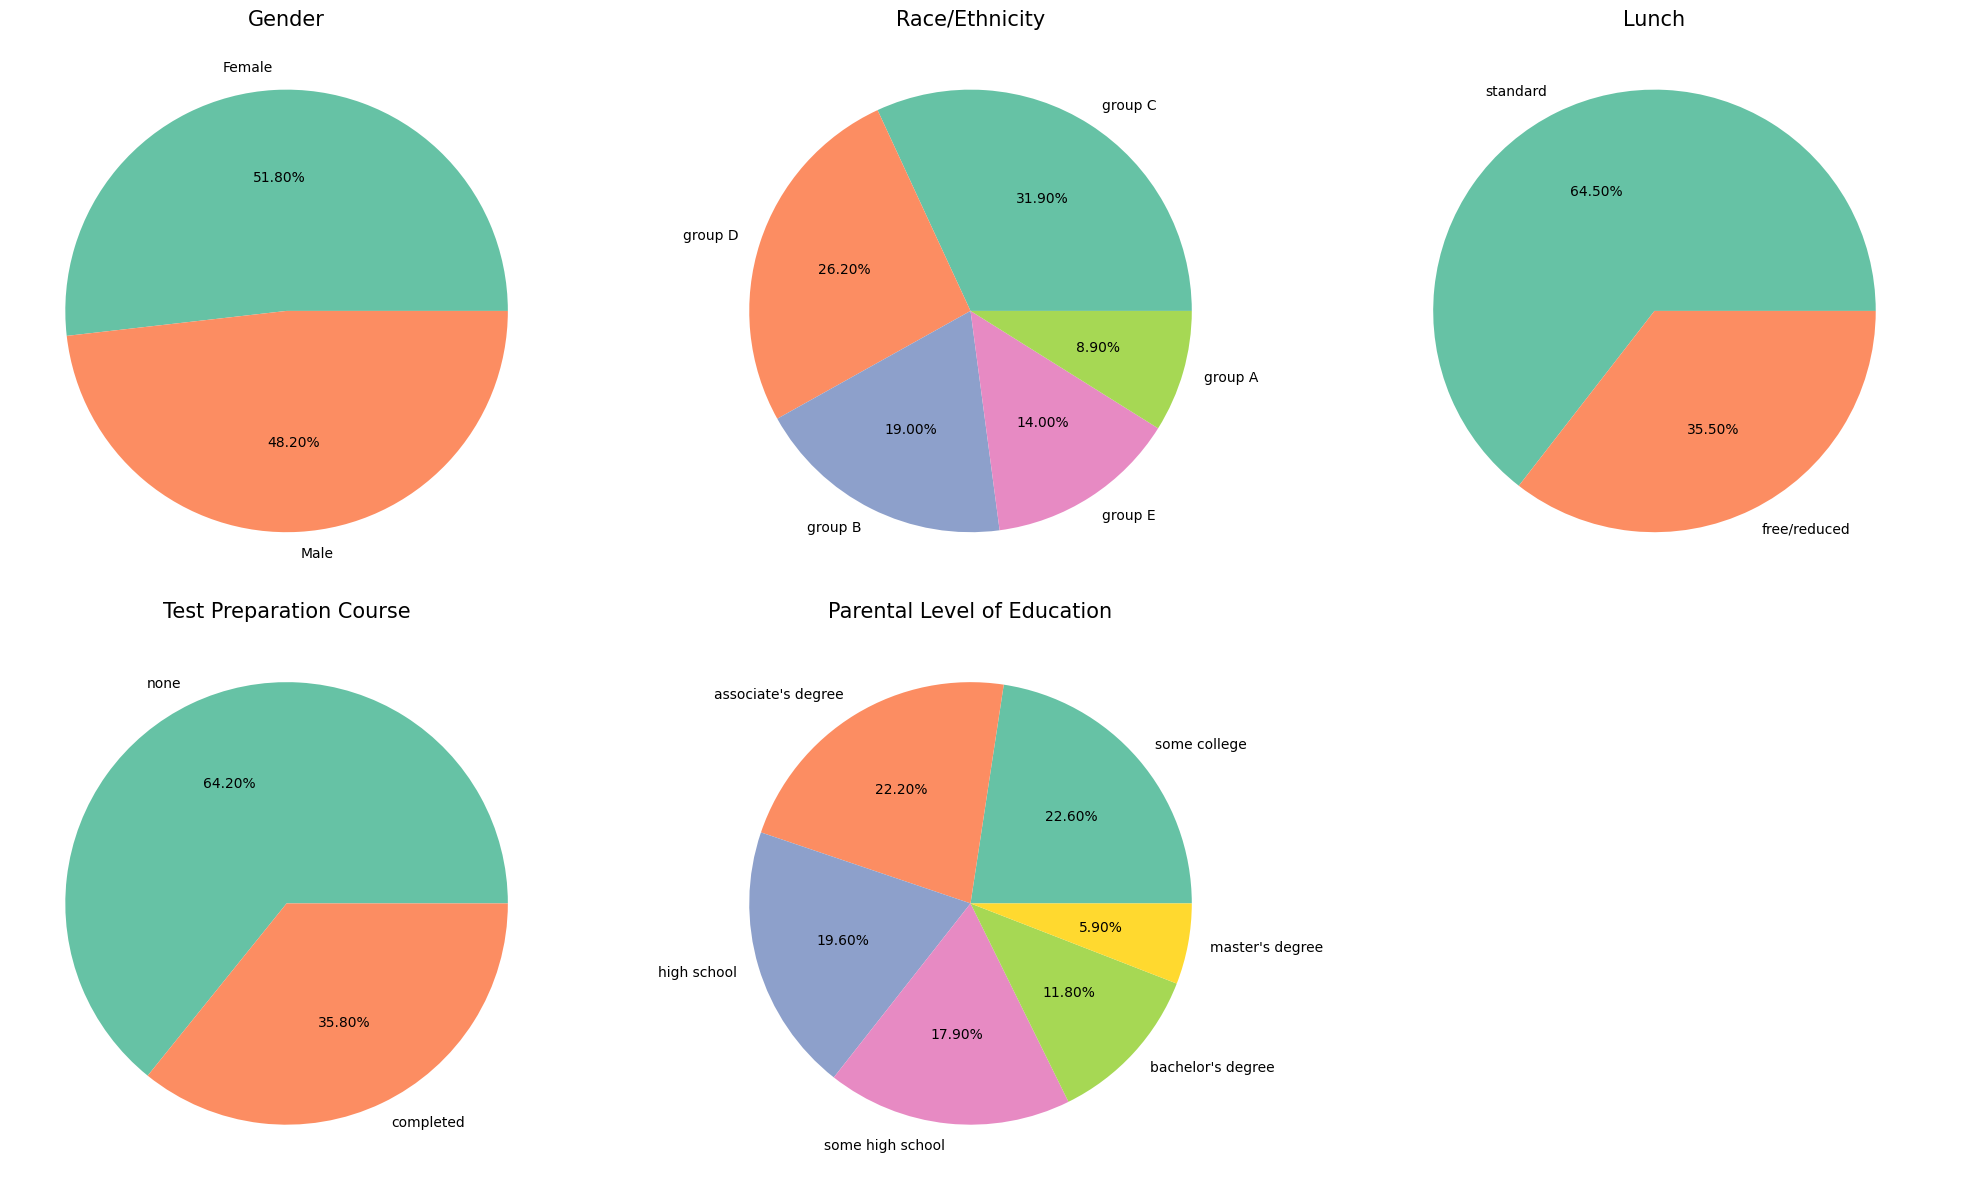

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Create a 2x3 grid of subplots
colors = sns.color_palette('Set2', n_colors=6)  # You can choose different palettes

# Gender Pie Chart
size = df['gender'].value_counts()
labels = ['Female', 'Male']
# colors = ['red', 'green']
axes[0, 0].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[0, 0].set_title('Gender', fontsize=15)
axes[0, 0].axis('off')

# Race Ethnicity Pie Chart
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].value_counts().index  # Match size with correct labels
# colors = ['r', 'g', 'b', 'cyan', 'orange']
axes[0, 1].pie(size, labels=labels, colors=colors, autopct='%.2f%%')
axes[0, 1].set_title('Race/Ethnicity', fontsize=15)
axes[0, 1].axis('off')

# Lunch Pie Chart
size = df['lunch'].value_counts()
labels = df['lunch'].value_counts().index  # Match size with correct labels
# colors = ['r', 'g']
axes[0, 2].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[0, 2].set_title('Lunch', fontsize=15)
axes[0, 2].axis('off')

# Test Preparation Course Pie Chart
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].value_counts().index  # Match size with correct labels
# colors = ['r', 'g']  # Define colors if needed
axes[1, 0].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[1, 0].set_title('Test Preparation Course', fontsize=15)
axes[1, 0].axis('off')

# Parental Level of Education Pie Chart
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].value_counts().index  # Match size with correct labels
# colors = ['r', 'g', 'b', 'cyan', 'orange', 'yellow']

axes[1, 1].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[1, 1].set_title('Parental Level of Education', fontsize=15)
axes[1, 1].axis('off')

# Remove the last empty subplot (optional)
axes[1, 2].axis('off')  # Turn off the empty subplot in the 2x3 grid

plt.tight_layout()
plt.show()


**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?
### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

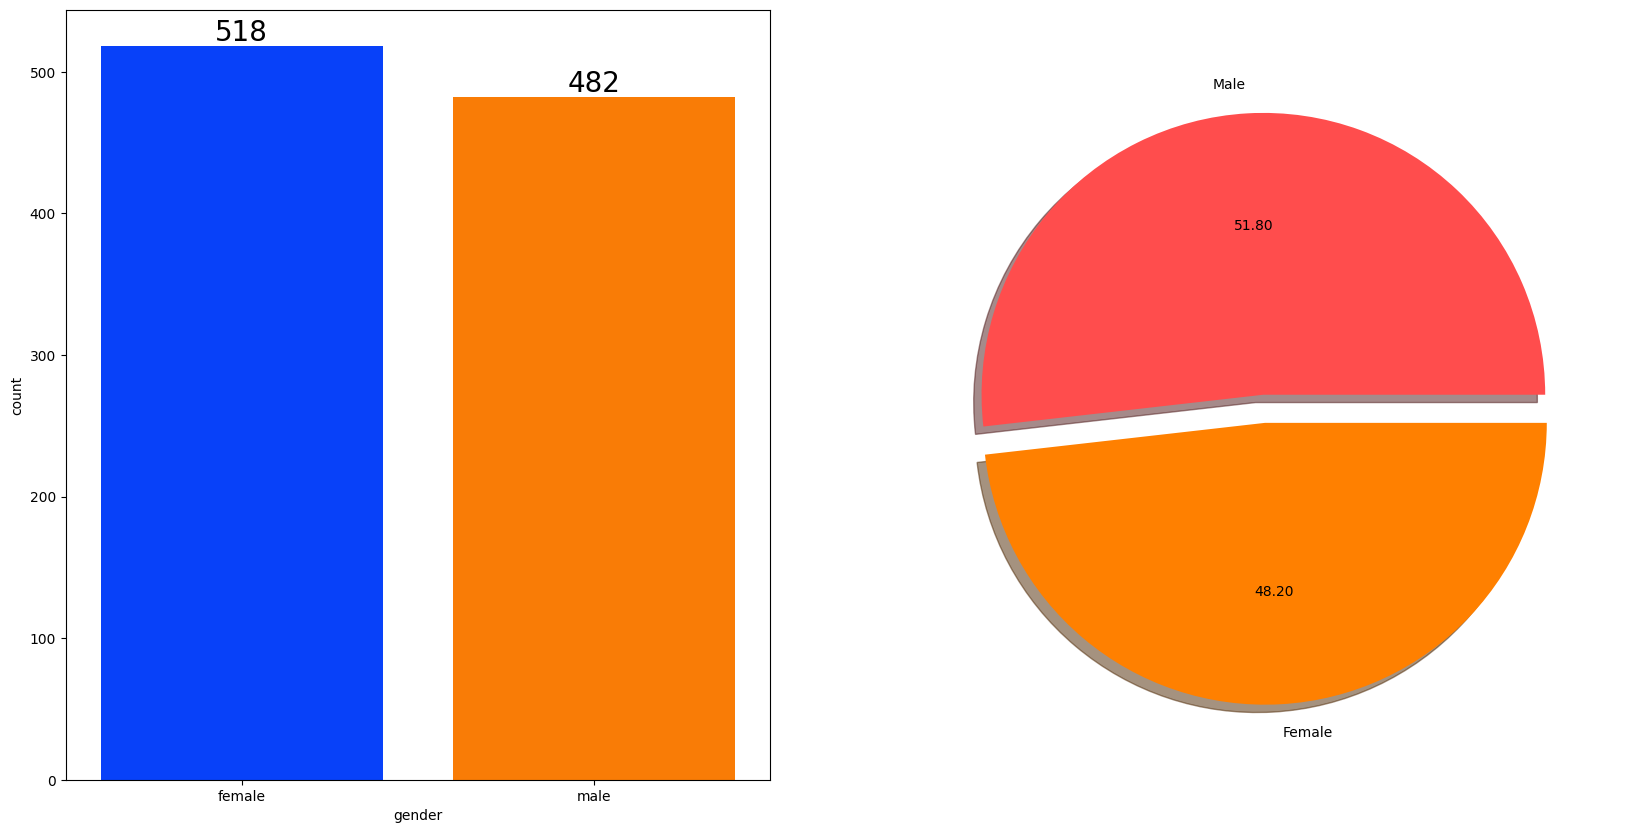

In [28]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df.gender, data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%.2f',shadow=True, colors=['#ff4d4d','#ff8000'])
plt.axis('off')
plt.show()

**Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)
### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )


In [29]:
gender_group = df.groupby('gender')[['average', 'math_score', 'reading_score','writing_score']].mean()
print(gender_group)


          average  math_score  reading_score  writing_score
gender                                                     
female  69.569498   63.633205      72.608108      72.467181
male    65.837483   68.728216      65.473029      63.311203


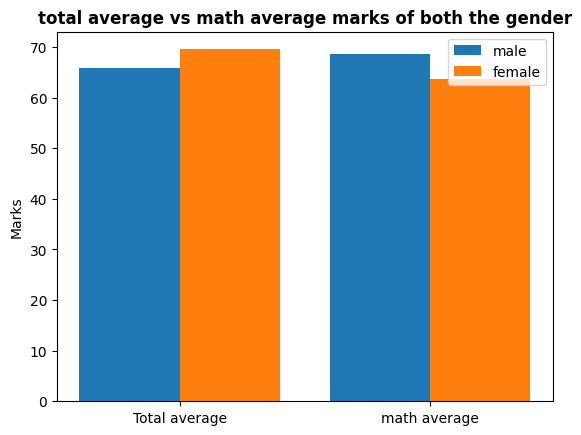

In [37]:
X=['Total average','math average']
female_scores=[gender_group.loc['female','average'],gender_group.loc['female','math_score']]
male_scores=[gender_group.loc['male','average'],gender_group.loc['male','math_score']]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='male')
plt.bar(X_axis+0.2,female_scores,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('total average vs math average marks of both the gender',fontweight='bold')

plt.legend()
plt.show()

**Insights**
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.
### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?
### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

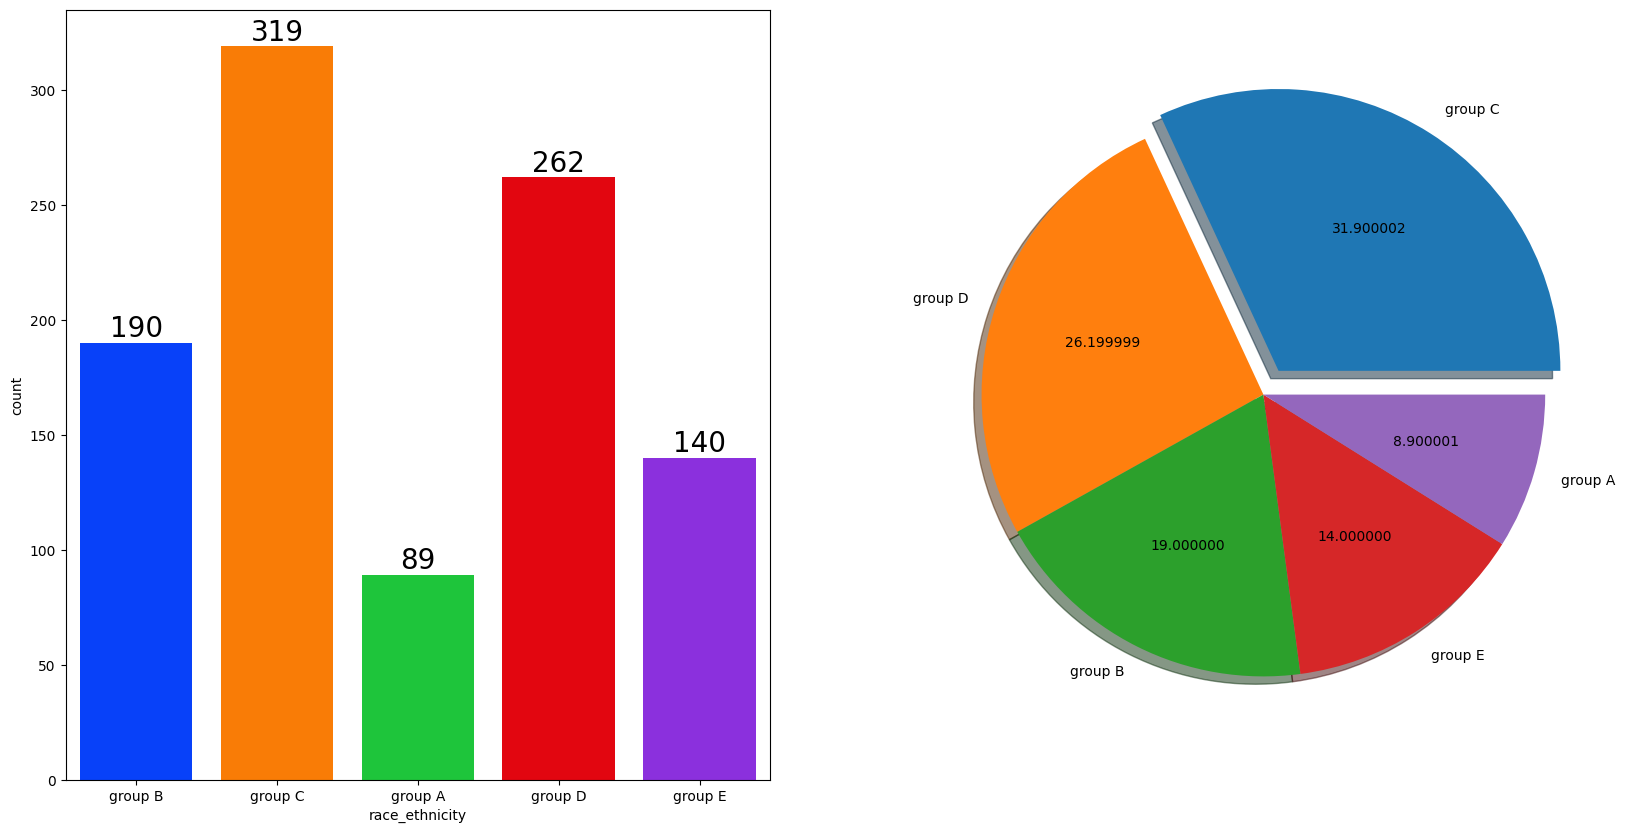

In [45]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df.race_ethnicity,data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df.race_ethnicity.value_counts(),labels=df.race_ethnicity.value_counts().index,explode=[0.1,0,0,0,0],autopct='%2f',shadow=True)
plt.show()

**Insights**
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.